In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
data = pd.read_excel('C:/Users/Naois/Documents/Udemy Resources/Python - Finance/Section 13 - Univariate Regression Analysis/Lectures/Housing.xlsx')

In [4]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
House Price             20 non-null int64
House Size (sq.ft.)     20 non-null int64
State                   20 non-null object
Number of Rooms         20 non-null int64
Year of Construction    20 non-null int64
dtypes: int64(4), object(1)
memory usage: 880.0+ bytes


In [6]:
data.head(2)

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992


In [7]:
data.tail(2)

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
18,650000,950,TX,2,1987
19,680000,1250,TX,4,2000


In [8]:
x = data['House Size (sq.ft.)']
y = data['House Price']

In [12]:
x.tail()

15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [11]:
y.tail()

15    900000
16    730000
17    750000
18    650000
19    680000
Name: House Price, dtype: int64

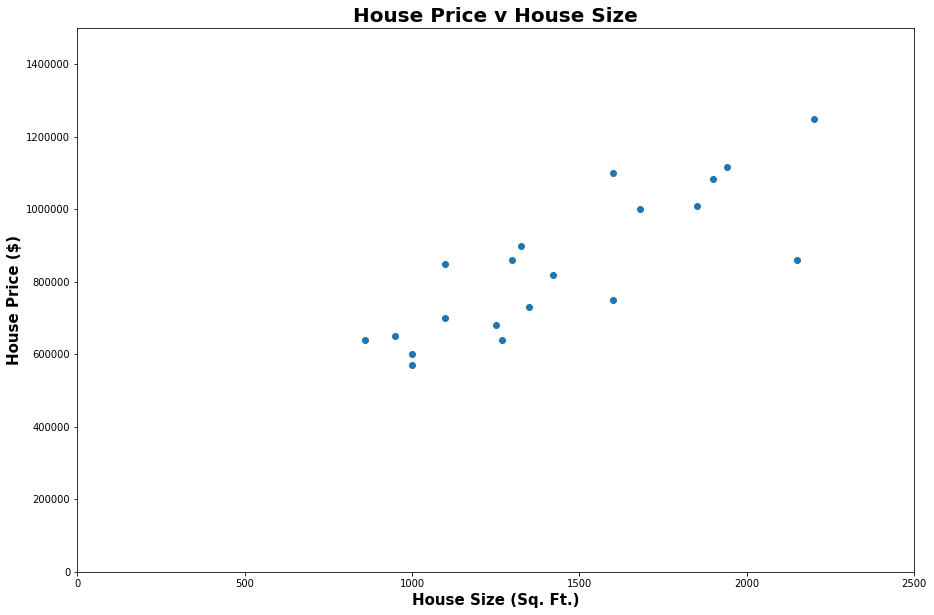

In [20]:
plt.figure(figsize = (15,10))
plt.title('House Price v House Size', fontsize = 20, weight = 'bold')
plt.xlabel('House Size (Sq. Ft.)', fontsize = 15, weight = 'bold')
plt.ylabel('House Price ($)', fontsize = 15, weight = 'bold')
plt.axis([0,2500,0,1500000])
plt.margins(x = 0)
plt.scatter(x,y)
plt.show()

In [21]:
x1 = sm.add_constant(x)
reg = sm.OLS(y, x1).fit()               #'OLS' = Ordinary Least Squares

In [22]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Wed, 29 May 2019   Prob (F-statistic):           8.13e-06
Time:                        20:31:46   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
slope,intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [24]:
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)

401.91628631922595
260806.2360560964
0.8235775534696924
8.129642377231308e-06
65.24299510636492


In [25]:
#Manual computation of R value using R^2 value
from math import sqrt
sqrt(0.678)

0.8234075540095561

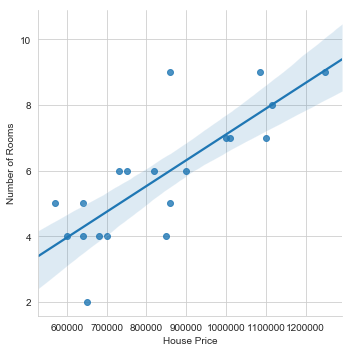

In [26]:
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot('House Price', 'Number of Rooms', data = data)